# <div align="center">CM4</div>

## 4.1 Importing Libraries

In [1]:
# Handle table-like data and matrices :
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# Modelling Helpers Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

# Deep Learning Libraries
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

# Resnet 
import keras
from keras.layers import AveragePooling2D, Input, Flatten
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.regularizers import l2
from keras.models import Model
import os
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Machine Learning Model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Time library
import time 


# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import itertools



/kaggle/input/asgn4fashionmnist/fashion_mnist_dataset_train.npy


## 4.2 Extract Dataset

- Dataset is in .npy file and after extract it converted into 0-D array.
- We converted 0-D array to dictionary and then created Dataframe using pandas library.

In [2]:
data = np.load('../input/asgn4fashionmnist/fashion_mnist_dataset_train.npy', allow_pickle=True).item()
data = np.array(data)
my_dict = data[()]

In [3]:
features = my_dict.get('features')
target = my_dict.get('target')

In [4]:
farray = features.reshape(features.shape[0], (features.shape[1]*features.shape[2]))

In [5]:
column_names = []
[column_names.append("pixel"+str(x)) for x in range(0, 784)]
f1 = pd.DataFrame(farray , columns = column_names)

In [6]:
f1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
column_names = ['target']
t1  = pd.DataFrame(target , columns = column_names)
t1.head()

,target
0,5.0
1,2.0
2,1.0
3,2.0
4,1.0


**Note :**
- As we are going to apply One hot encoding on target variable we decrease target values by 1.
- Otherwise during One Hot encoding we faced error of IndexOutOfBound error for last target value in to_categorical.

In [8]:
f1['target'] = t1['target'] - 1

### 4.3 Dataset overview 

1. Dataset contains 28*28 size 60000 images and one target feature as a label.
2. Compare to FashionMNIST original dataset instead of 10 this dataset contains only 5 labels.
3. Each label contains around 12000 images so images are equally distributed across labels.

In [9]:
f1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,target
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
f1['target'].value_counts()

1.0    12019
2.0    12011
3.0    11992
0.0    11989
4.0    11989
Name: target, dtype: int64

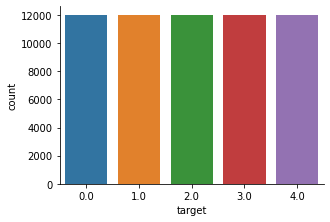

In [11]:
import seaborn as sns
sns.catplot(x='target', data=f1, kind='count', height=3, aspect= 1.5)

#### 4.3.1 Fashion MNIST images with 10 labels 
![](https://www.researchgate.net/profile/Greeshma-K-V/publication/340299295/figure/fig1/AS:875121904476163@1585656729996/Fashion-MNIST-Dataset-Images-with-Labels-and-Description-II-LITERATURE-REVIEW-In-image.jpg)

## 4.4 Visualization of Dataset 

In [12]:
clothing = {0 : 'T-shirt/top/pants',
            1 : 'coat/trouser',
            2 : 'Dress',
            3 : 'Sandal/Boot/pullover',
            4 : 'Sneaker/Bag/Ankle Boots'}

clothing2 = {0 : '1',
            1 : '2',
            2 : '3',
            3 : '4',
            4 : '5'}

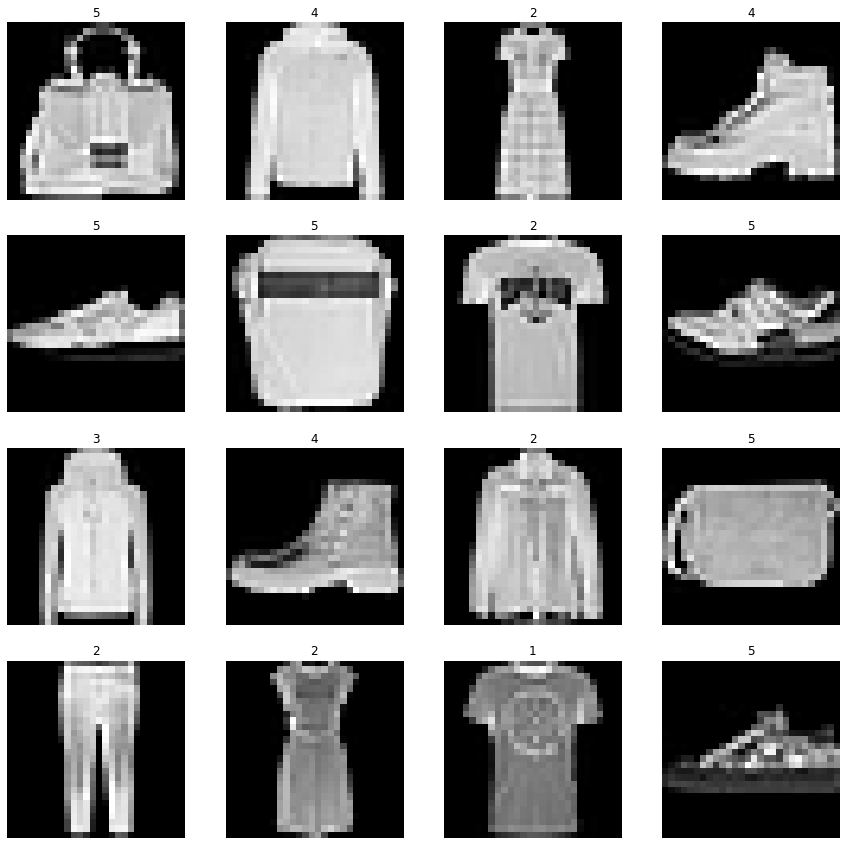

In [13]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = f1.drop('target', axis=1).values[index].reshape(28,28)
        cloths = f1['target'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing2[cloths])
        axe.set_axis_off()

#### Analysis from dataset :

- As from above plot we can see that there is mixed images in each target variable. Which may cause in performance while training neural networks and machine learning models.
- Moreover using trial and error method, we identified that most of the shoes/sandal/ankle boots/bags are fall under target variable '4' and '5'. However some of them items are also fall under target variable '3'.
- Cloth items are included in first 3 target variables but ditribution between first 3 variables are not clear.

### 4.5 Data Preprocessing

#### 4.5.1 Setting Random Seeds for Reproducibilty.

- In order to generate same random numbers on multiple executions of the code on the same machine or on different machines (for a specific seed value).

In [14]:
seed = 66
np.random.seed(seed)

#### 4.5.2 Splitting Data into Train and Validation Set

- We are gonna split the training data into Train, Validation and Test Set. Train set is used for Training the model and Validation set is used for tuning parameters of our model and compute different Model's Performance on the Dataset. Test set to predict label and compute best Model's Performance.

- This is achieved using the train_test_split method of scikit learn library.

- We have split our dataset into 80% training, 10% validation and 10% for testing.

In [15]:
X = f1.iloc[:, :-1]
Y = f1.iloc[:,784]
x_train1, x_valtest, y_train, y_valtest = train_test_split(X, Y, test_size=0.2, random_state=seed)
x_val1,x_test1,y_val,y_test = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=seed)

In [16]:
print(len(x_train1))
print(len(x_test1))
print(x_train1.size)
print(x_test1.size)
print(x_val1.size)

48000
6000
37632000
4704000
4704000


#### 4.5.3 Reshaping Image :

- As we have each images as 1D vector each containing 784 pixels. Before we feed the data to the CNN we must reshape the data into (28x28x1) 3D matrices.
- If dataset contains RGB images, there would have been 3 channels, but as dataset is gray scale it only uses one channel.
- We have to reshape each images as Keras wants an Extra Dimension in the end, for channels.

**Note :**

- We are going to reshape x_train, x_val and x_test for neural networks during preprocessing.
- As we also build a Machine Learning model we will use without reshaped values.

In [17]:
x_train = x_train1.values.reshape((-1, 28, 28, 1))
x_val = x_val1.values.reshape((-1, 28, 28, 1))
x_test = x_test1.values.reshape((-1, 28, 28, 1))

#### 4.5.4 Normalization ( Not required ) :

- Sometimes the image pixel value are  stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte.
- They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster.
- But in our dataset each image pixel values are already scaled down to [0,1] so we skipped this normalization step.
- Using normalization we can acheive Zero Mean and Unit Variance.


In [18]:
#x_train = x_train.astype("float32")/255
#x_test = x_test.astype("float32")/255
#x_val = x_val.astype("float32")/255

#### 4.5.5 One Hot Encoding :

- A one hot encoding is a representation of categorical variables as binary vectors.
- The labels are given as integers between 1-5. Which we then updated to 0-4 so that we can use to_categorical function.
- We applied one hot encode them , Eg 3 [0, 0, 1, 0, 0].
- As dataset have 5 labels so after One hot encoding we have the target variable with 5 classes. 

In [19]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [20]:
print(y_train.shape)
print(y_test.shape)

(48000, 5)
(6000, 5)


### 4.6 Training a Convolutional Neural Network ( Model 1 )

#### 4.6.1 Building a ConvNet :


**1) Conv2D :**
- Notice at as our output spatial volume is decreasing our number of filters learned is increasing — this is a common practice in designing CNN architectures.

**Conv2D  Parameters:**
- **filters :** As far as choosing the appropriate number of filters , I nearly always recommend using powers of 2 as the values.
- **kernel_size :** The kernel_size must be an odd integer as well.
- **strides :** The strides parameter specifies the “step” of the convolution along the x and y axis of the input volume. We have select strides 1 which means : 
     1. A convolutional filter is applied to the current location of the input volume.
     2. The filter takes a 1-pixel step to the right and again the filter is applied to the input volume.
     3.This process is performed until we reach the far-right border of the volume in which we move our filter one pixel down and then start again from the far left.
- **padding :** This parameter values are "valid" or "same". As we want to preserve the spatial dimensions of the volume such that the output volume size matches the input volume size we have selected "same". We will reduce spatial dimensions of our volume by Max pooling.
- **data_format :** This parameter values are "channels_last" or "channels_first". The TensorFlow backend to Keras uses channels last ordering. We used "channels_last" in convolution network.


<img src=https://pyimagesearch.com/wp-content/uploads/2018/12/keras_conv2d_channel_ordering.png width="250">

    
**2) Maxpool :**
- Max pooling is then used to reduce the spatial dimensions of the output volume.


**Note :**
-  we can use strides=2 to help reduce the size of the output volume.

#### 4.6.2  The design of Convolution neural networks definition : 

1) Firstly we used **Sequential Keras API** which is just a linear stack of layers.

2) Then we include **Convolutional Layers**, this operation performs below operations :
    1. Apply filters to extract features.
    2. Apply activation function( in our case 'relu' ) on every every input value of feature maps.
    3. Filters are composed of small kernels learned.

3) Next we apply **Batch Normalization** to achieve zero mean and zero variance on image pixels after each convolution.

4) Then we add **Max Pooling Layers**, which are used for Dimensionality Reduction or DownSampling the Input. These are used where we have lot of Input Features. It reduces the amount of Parameters and Computational power required drastically, thus reducing Overfitting. These along with Convolutional layers are able to learn more Complex features of the Image.

5) We add **Dropout Layers** to avoid Overfitting. DropOut is a Regularization Technique, which Penalizes the Parameters. We DropOutRate to 0.25. Usually in general we can set this rate between 0.2-0.5.

6) Then we include **Flatten layer** to map the input to a 1D vector. We then add Fully connected Layers after some convolutional/pooling layers.

7) Lastly, we add the **Dense (Output) Layer**. It has units equal to the number of classes to be identified.Here, we use 'softmax' function since it is Multi-Class Classification. For binary classification we can use 'sigmoid' function.


#### Different Activation Function : 

1. **relu :**

- ReLU (Rectified Linear Activation function) is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.
- It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
- **Function :** g(z) = max{0, z}

2. **sigmoid :**

- The sigmoid activation function, also called the logistic function.
- The input to the function is transformed into a value between 0.0 and 1.0. Inputs that are much larger than 1.0 are transformed to the value 1.0, similarly, values much smaller than 0.0 are snapped to 0.0.
- The shape of the function for all possible inputs is an S-shape from zero up through 0.5 to 1.0.
- **Function :** s(x) = 1/(1+e^(-x))



3. **tanh :**

- The hyperbolic tangent function, or tanh is a similar shaped nonlinear activation function that outputs values between -1.0 and 1.0.
- - **Function :** tanh(x) = (e^x - e^(-x))/(e^x + e^(-x))


4. **softmax :**

- This function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.
- Softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels. In this dataset we use this activation function in the output layer for each neural network.
- **Function :**
![](http://www.gstatic.com/education/formulas2/355397047/en/softmax_function.svg)


#### Limitations of sigmoid and tanh :

- A general problem with both the sigmoid and tanh functions is that these functions are saturate.
- This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid respectively.
- Moreover these two functions are only really sensitive to changes around their mid-point of their input, such as 0.5 for sigmoid and 0.0 for tanh.



**Note :**
- Each activaton function 'sigmoid' and 'tanh' performance are included in CM6.

In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

#### 4.6.3 Optimizer of the model :

- Before model compilation we need to set optimizer used by the model. We have multiple options for optimizer e.g ADAM, SGD, ADAGRAD, ADADELTA, RMSPROP.
- **Parameters :** 
    - **learning rate :** the learning rate is a configurable hyperparameter used in the training of neural networks. The learning rate controls how quickly the model is adapted to the problem.
    - **beta1 :** The exponential decay rate for the first moment estimates (e.g. 0.9).
    - **beta2 :** The exponential decay rate for the second-moment estimates (e.g. 0.999).


![](http://www.linkpicture.com/q/1_osB82GKHBOT8k1idLqiqA-99.png)


**Learning rate adjustment :**
- The learning rate controls how quickly the model is adapted to the problem.
- Smaller learning rates require more training epochs given the smaller changes made to the weights each update.
- Larger learning rates result in rapid changes and require fewer training epochs.

**Problem with too large or small learning rate value :**
* A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution.
* A learning rate that is too small can cause the process to get stuck.

**Note :**
- The learning rate is perhaps the ***most important hyperparameter***.

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

# SGD 
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# RMSProp

optimizer_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Adagrad
optimizer_adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)

# Adadelta
optimizer_adadelta = tf.keras.optimizers.Adadelta(learning_rate=0.01)


#### 4.6.4 Model compilation :

- During model compile we need to specify the **loss** function for the neural network which we want to minimize. For Multi-class Classification we use "categorical_crossentropy" and for Binary Classification we use "binary_crossentropy".
- We need to specify the **metric** to evaluate our models performance. Here we used accuracy.

In [23]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

#### 4.6.5 Model Summary :

Summary shows below things of our model :

- The layers and their order in the model.
- The output shape of each layer.
- The number of parameters (weights) in each layer.
- The total number of parameters (weights) in the model.

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

#### 4.6.6 Learning Rate Decay :

- We should tuned our learning so that it is not too high to take very large steps, neither it should be too small which not change weights and bias of the model.
- We use **LearningRateScheduler** here, which takes the step decay function as argument and return the updated learning rates for use in optimzer at every epoch stage. 
- So at every epoch learning rate will be change by LearningRateScheduler.

In [25]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

#### 4.6.7 Data Augmentation : 

- Data Augmentation is like adding a data and/or noise to a dataset, so that model can perform well in various patterns.
- For example, what if our images will have object at some angle ? In that case mostly our model will fail to predict right label.
- So using data augmentation our model will build with different variations so that model performance on variety of input will remain same.


In [26]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)

In [27]:
datagen.fit(x_train)

#### 4.6.8 Model fitting :

- **batch size :** The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.
- **epochs :** The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

In [28]:
batch_size = 128
epochs = 25

In [29]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_val, y_val), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/25
375/375 - 20s - loss: 0.8274 - accuracy: 0.6723 - val_loss: 2.9754 - val_accuracy: 0.2008
Epoch 2/25
375/375 - 15s - loss: 0.5895 - accuracy: 0.7612 - val_loss: 0.4538 - val_accuracy: 0.8080
Epoch 3/25
375/375 - 16s - loss: 0.5323 - accuracy: 0.7857 - val_loss: 0.4347 - val_accuracy: 0.8212
Epoch 4/25
375/375 - 15s - loss: 0.4911 - accuracy: 0.8027 - val_loss: 0.3714 - val_accuracy: 0.8467
Epoch 5/25
375/375 - 15s - loss: 0.4761 - accuracy: 0.8068 - val_loss: 0.3637 - val_accuracy: 0.8527
Epoch 6/25
375/375 - 15s - loss: 0.4538 - accuracy: 0.8177 - val_loss: 0.3515 - val_accuracy: 0.8530
Epoch 7/25
375/375 - 15s - loss: 0.4423 - accuracy: 0.8222 - val_loss: 0.3486 - val_accuracy: 0.8547
Epoch 8/25
375/375 - 16s - loss: 0.4239 - accuracy: 0.8292 - val_loss: 0.4026 - val_accuracy: 0.8233
Epoch 9/25
375/375 - 16s - loss: 0.4168 - accuracy: 0.8331 - val_loss: 0.4718 - val_accuracy: 0.8017
Epoch 10/25
375/375 - 17s - loss: 0.4086 - accuracy: 0.8378 - val_loss: 0.3330 - val_accura

### 4.7 Model Evaluation : 



In [30]:
start_time = time.time() 
score = model.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))
print("--- %s seconds ---" % (time.time() - start_time))

188/188 [==============================] - 1s 3ms/step - loss: 0.2979 - accuracy: 0.8735
Loss: 0.2979
Accuracy: 0.8735
--- 0.6089019775390625 seconds ---


### 4.8 Prediction on Test data :

In [31]:
test_score = model.evaluate(x_test, y_test)
print("Loss: {:.4f}".format(test_score[0]))
print("Accuracy: {:.4f}".format(test_score[1]))

188/188 [==============================] - 1s 3ms/step - loss: 0.2735 - accuracy: 0.8840
Loss: 0.2735
Accuracy: 0.8840


### 4.8 Prediction on Test data ( Way 2 ) :

- We can also predict using method calls predict_classes and then check accuracy. However this method in deprecated so we will not use on test dataset.

In [32]:
#y_pred3=model.predict_classes(x_test)
#y_true=np.argmax(y_test,axis=1)
#model_acc = accuracy_score(y_true, y_pred3)
#print('Accuracy Score of Model = ', model_acc)


## 4.9 Training and validation curves on loss vs epochs

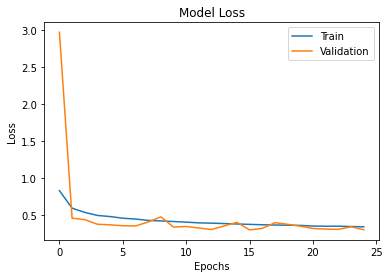

--- 0.14694428443908691 seconds ---


In [33]:
start_time = time.time() 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 4.10 Training and validation curves on accuracy vs epochs

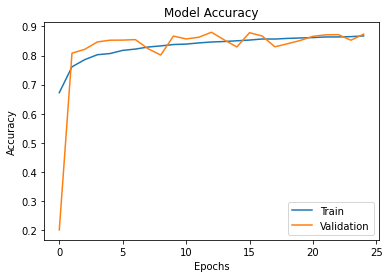

--- 0.15070080757141113 seconds ---


In [34]:
start_time = time.time()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

**Note :**
- The Training and Validation Curves being close, we can conclude that the Model is not Overfitting the Data.

## 4.11 Confusion Matrix :

- A confusion matrix is a technique for summarizing the performance of a classification algorithm.
- The matrix compares the actual target values with those predicted by the model.

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

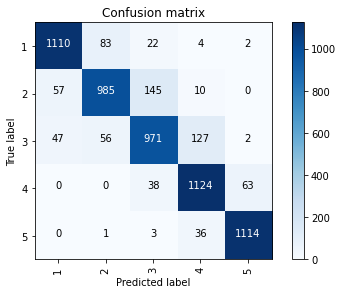

In [36]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['1','2','3','4','5'])

### Correctly predicted classes

In [37]:
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 


--- 0.28609752655029297 seconds ---


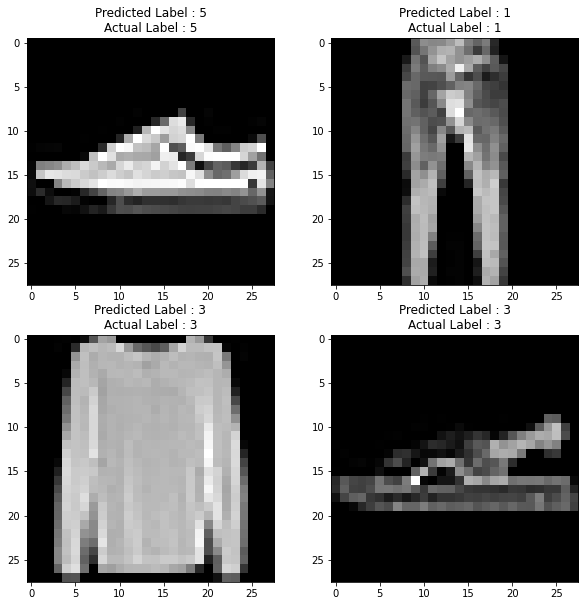

In [38]:
start_time = time.time()
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break
        

fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[correct[3]]]))

print("--- %s seconds ---" % (time.time() - start_time))

### Incorrectly Predicted Classes

--- 0.08302950859069824 seconds ---


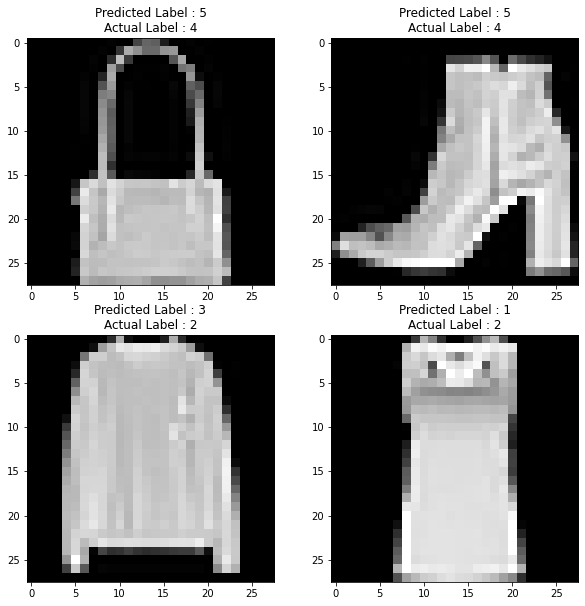

In [39]:
 start_time = time.time()
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break
        
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing2[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " + 
                 str(clothing2[Y_true[incorrect[3]]]))

print("--- %s seconds ---" % (time.time() - start_time))

## 4.12 Classification Report

The classification report visualizer displays the precision, recall, F1, and support scores for the model.

1. Precision :
    - Precision is the ability of a classiifer not to label an instance positive that is actually negative. 
    - Basically, it is defined as as the ratio of true positives to the sum of true and false positives. “For all instances classified positive, what percent was correct?”

2. Recall :

    - Recall is the ability of a classifier to find all positive instances. 
    - For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. “For all instances that were actually positive, what percent was classified correctly?”

3. F1 Score:

    - The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0 . 
    - Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

4. Supprt :

    - Support is the number of actual occurrences of the class in the specified dataset. 
    - Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.






In [40]:
classes = ['1','2','3','4','5']
print(classification_report(Y_true, Y_pred_classes, target_names = classes,zero_division=1))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91      1221
           2       0.88      0.82      0.85      1197
           3       0.82      0.81      0.82      1203
           4       0.86      0.92      0.89      1225
           5       0.94      0.97      0.95      1154

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



## 4.13 Other models :

- Resnet Model (4.14)
- ML model ( RandomForest ) (4.15)
- Simple Neural Networks (4.16)

## 4.14 Resnet Published Architecture

**Disadvantages of CNN :**
1. When we increase the number of layers in CNN, there is a common problem in deep learning associated with that called Vanishing/Exploding gradient.
2. This causes the gradient to become 0 or too large. Thus when we increases number of layers, the training and test error rate also increases.

**Solution : Residuals blocks**
- In order to solve the problem of the vanishing/exploding gradient, this architecture introduced the concept called Residual Network.
- Residuals network we use a technique called skip connections . The skip connection skips training from a few layers and connects directly to the output.

![](https://miro.medium.com/max/477/0*sGlmENAXIZhSqyFZ)

- The picture above is the most important thing to learn in Resnet Architecture.
- We implemented this and test it out, the most important modification to understand is the ‘Skip Connection’, identity mapping.
- The Skip Connections between layers add the outputs from previous layers to the outputs of stacked layers.This results in the ability to train much deeper networks than what was previously possible.
- This identity mapping does not have any parameters and is just there to add the output from the previous layer to the layer ahead.


**Identity mapping work in Resnet :**

- During backpropagation, there are two pathways for the gradients to transit back to the input layer while traversing a residual block.
    1. pathway-1 is the identity mapping way
    2. pathway-2 is the residual mapping way.

![](https://cdn-5f733ed3c1ac190fbc56ef88.closte.com/wp-content/uploads/2019/07/Grad_path.png)

In [41]:
input_size = (28, 28,1)
num_filters = 64
use_max_pool = False
num_blocks = 4
num_sub_blocks = 2
num_classes = 5
inputs = Input(shape=input_size)
con_x = Conv2D(num_filters, padding='same', 
           kernel_initializer='he_normal', 
           kernel_size=7, strides=2,
           kernel_regularizer=l2(1e-4))(inputs)
con_x = BatchNormalization()(con_x)
con_x = Activation('relu')(con_x)

#Check by applying max pooling later (setting it false as size of image is small i.e. 28x28)
if use_max_pool:
    con_x = MaxPooling2D(pool_size=3,padding='same', strides=2)(con_x)
    num_blocks =3
#Creating Conv base stack 

# Instantiate convolutional base (stack of blocks).
for i in range(num_blocks):
    for j in range(num_sub_blocks):
        strides = 1
        is_first_layer_but_not_first_block = j == 0 and i > 0
        if is_first_layer_but_not_first_block:
            strides = 2
        #Creating residual mapping using y
        con_y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   strides=strides,
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(con_x)
        con_y = BatchNormalization()(con_y)
        con_y = Activation('relu')(con_y)
        con_y = Conv2D(num_filters,
                   kernel_size=3,
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(con_y)
        con_y = BatchNormalization()(con_y)
        if is_first_layer_but_not_first_block:
            con_x = Conv2D(num_filters,
                       kernel_size=1,
                       padding='same',
                       strides=2,
                       kernel_initializer='he_normal',
                       kernel_regularizer=l2(1e-4))(con_x)
        #Adding back residual mapping
        con_x = keras.layers.add([con_x, con_y])
        con_x = Activation('relu')(con_x)

    num_filters = 2 * num_filters

# Add classifier on top.
con_x = AveragePooling2D()(con_x)
con_y = Flatten()(con_x)
outputs = Dense(num_classes,
                activation='softmax',
                kernel_initializer='he_normal')(con_y)

# Instantiate and compile model.
resmodel = Model(inputs=inputs, outputs=outputs)
resmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
resmodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 14, 14, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 14, 14, 64)   256         conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 14, 14, 64)   0           batch_normalization_5[0][0]      
______________________________________________________________________________________________

In [42]:
save_dir = os.path.join(os.getcwd(), 'saved_model')
model_name = 'fmnist_resnet_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir,model_name)
print(filepath)

/kaggle/working/saved_model/fmnist_resnet_model.h5


In [43]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             verbose=1,
                             save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [checkpoint, lr_reducer]

In [44]:
start_time = time.time()
resmodel.fit(x_train, y_train, batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True,
              callbacks=callbacks)
print("--- %s seconds ---" % (time.time() - start_time)) 

Epoch 1/25
375/375 [==============================] - 15s 32ms/step - loss: 1.6820 - accuracy: 0.7596 - val_loss: 1.2298 - val_accuracy: 0.8082

Epoch 00001: val_loss improved from inf to 1.22979, saving model to /kaggle/working/saved_model/fmnist_resnet_model.h5
Epoch 2/25
375/375 [==============================] - 11s 30ms/step - loss: 1.0116 - accuracy: 0.8678 - val_loss: 0.8698 - val_accuracy: 0.8732

Epoch 00002: val_loss improved from 1.22979 to 0.86977, saving model to /kaggle/working/saved_model/fmnist_resnet_model.h5
Epoch 3/25
375/375 [==============================] - 11s 30ms/step - loss: 0.7827 - accuracy: 0.8951 - val_loss: 0.7868 - val_accuracy: 0.8610

Epoch 00003: val_loss improved from 0.86977 to 0.78685, saving model to /kaggle/working/saved_model/fmnist_resnet_model.h5
Epoch 4/25
375/375 [==============================] - 11s 30ms/step - loss: 0.6456 - accuracy: 0.9054 - val_loss: 0.6776 - val_accuracy: 0.8732

Epoch 00004: val_loss improved from 0.78685 to 0.67758,

In [45]:
start_time = time.time() 
score = resmodel.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))
print("--- %s seconds ---" % (time.time() - start_time))

188/188 [==============================] - 1s 7ms/step - loss: 0.6334 - accuracy: 0.9027
Loss: 0.6334
Accuracy: 0.9027
--- 1.459258794784546 seconds ---


In [46]:
scores = resmodel.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

188/188 [==============================] - 1s 7ms/step - loss: 0.6334 - accuracy: 0.9027
Test loss: 0.633379340171814
Test accuracy: 0.9026666879653931


**Advantages of Resnet :**

1. ResNet uses Batch Normalization at its core. The Batch Normalization adjusts the input layer to increase the performance of the network. 
2. ResNet makes use of the Identity Connection, which helps to protect the network from vanishing gradient problem.
3. Deep Residual Network uses bottleneck residual block design to increase the performance of the network.

## 4.15 Machine Learning model (Random Forest with Gridsearch)

- In this model we use **GridSearchCV** for tuning hyperparameter of the classifier to evaluate the best accuaracy for the best max_depth value from [3,5,10,None] and best number of trees from [5,10,50,150,200] (Which values we supposed to selected in previous assignment).
- Here we use 3-fold validation else we are going to face MemoeryLeak or TimeOut error.

In [47]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,5,10, None],
    'n_estimators': [5,10,50,150, 200]
}
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [48]:
grid_search.fit(x_train1,y_train)
grid_search.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


{'bootstrap': True, 'max_depth': None, 'n_estimators': 200}

**Note :** 

- We have test this model using different combinations of max_depth, n_ estimators and k-fold cross validation and encounter that we should make these values limited else we face below error of timeout/mermory leak :

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
  

In [49]:
y_pred_rf = grid_search.predict(x_val1)

In [50]:
print('Accuracy for random forest:',metrics.accuracy_score(y_val,y_pred_rf))

Accuracy for random forest: 0.8116666666666666


#### Additional point in Machine Learning model about performance :
We can achieve **more accuracy** in this model if we apply **dimensionality reduction techniques (e.g PCA )** on data as we have too many number of features available to predict labels.

## 4.16 Simple Neural Networks

1) In our simple neural network model, we are not adding any convolutional, maxpooling, batch normalization or dropout layer.

2) Firstly we used Sequential Keras API which is just a linear stack of layers.

3) Then we include Flatten layer to map the input to a 1D vector.

4) Lastly, we add the Dense (Output) Layer. It has units equal to the number of classes to be identified.Here, we use 'softmax' function since it is Multi-Class Classification. For binary classification we can use 'sigmoid' function.

In [51]:
from tensorflow import keras
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

In [52]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 101,125
Trainable params: 101,125
Non-trainable params: 0
_________________________________________________________________


In [53]:
model3.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [54]:
history3 = model3.fit(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_val, y_val), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/25
375/375 - 14s - loss: 0.9608 - accuracy: 0.5939 - val_loss: 0.7760 - val_accuracy: 0.6875
Epoch 2/25
375/375 - 15s - loss: 0.7777 - accuracy: 0.6824 - val_loss: 0.6751 - val_accuracy: 0.7293
Epoch 3/25
375/375 - 14s - loss: 0.7201 - accuracy: 0.7059 - val_loss: 0.6495 - val_accuracy: 0.7388
Epoch 4/25
375/375 - 15s - loss: 0.6873 - accuracy: 0.7221 - val_loss: 0.6172 - val_accuracy: 0.7490
Epoch 5/25
375/375 - 14s - loss: 0.6551 - accuracy: 0.7365 - val_loss: 0.6147 - val_accuracy: 0.7463
Epoch 6/25
375/375 - 15s - loss: 0.6466 - accuracy: 0.7386 - val_loss: 0.5981 - val_accuracy: 0.7545
Epoch 7/25
375/375 - 15s - loss: 0.6322 - accuracy: 0.7458 - val_loss: 0.5727 - val_accuracy: 0.7645
Epoch 8/25
375/375 - 14s - loss: 0.6202 - accuracy: 0.7533 - val_loss: 0.5832 - val_accuracy: 0.7555
Epoch 9/25
375/375 - 15s - loss: 0.6151 - accuracy: 0.7546 - val_loss: 0.5599 - val_accuracy: 0.7838
Epoch 10/25
375/375 - 15s - loss: 0.6064 - accuracy: 0.7580 - val_loss: 0.5552 - val_accura

In [55]:
start_time = time.time() 
score = model3.evaluate(x_val, y_val)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))
print("--- %s seconds ---" % (time.time() - start_time))

188/188 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8038
Loss: 0.5127
Accuracy: 0.8038
--- 0.40688180923461914 seconds ---


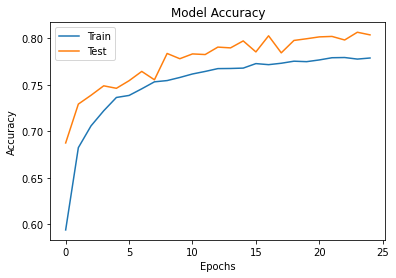

--- 0.14399313926696777 seconds ---


In [56]:
start_time = time.time()
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

## 4.17 Analysis :

- From above models it has been clear that we can achieve good accuracy on CNN and Resnet model.
- However we can also achieve 80% on Machine Learning model. We can achieve more performance we use Dimensionality Reduction method before Random forest as we have 784 features (28*28).
